## Ordinary Least Square Method (OLS)

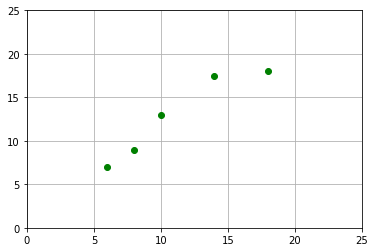

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

X = [[6], [8], [10], [14], [18]]
Y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid()

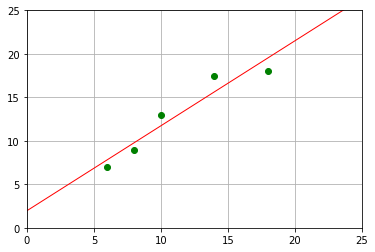

In [2]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Plot Initial Data 
plt.figure()
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid()

# Plot Regression Solution line
plt.plot([0, 25], model.predict([[0], [25]]), 
         color='r', linestyle='-', linewidth=1)

## Stochastic Gradient Descent


[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[ 7.   9.  13.  17.5 18. ]


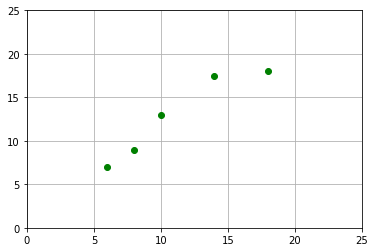

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [6, 8, 10, 14, 18]
X = np.array(X).reshape(-1, 1)
Y = [7, 9, 13, 17.5, 18]
Y = np.array(Y)
print(X)
print(Y)
plt.figure()
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid(True)


SGD Method ->  2.1304336211540624


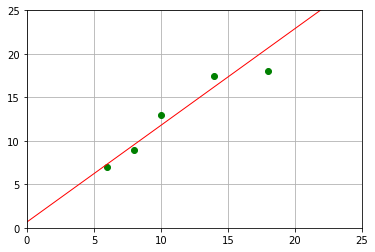

In [4]:
from sklearn.linear_model import SGDRegressor

# Create and fit the model
model = SGDRegressor(loss="squared_loss", max_iter=100)
model.fit(X, Y)

# Plot Initial Data 
plt.figure()
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid()

# Plot Regression Solution line
plt.plot([0, 25], model.predict([[0], [25]]), 
         color='r', linestyle='-', linewidth=1)

# model.score(X,Y)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, model.predict(X), 
                         multioutput='uniform_average')
print("SGD Method -> ",mse)

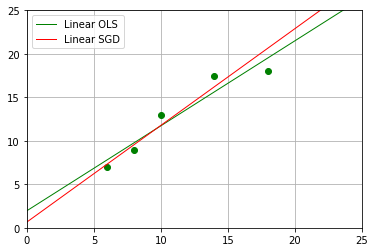

In [5]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
# YLin = Y.reshape(-1, 1)
modelL = LinearRegression()
modelL.fit(X, Y)

# Plot Initial Data 
plt.figure()
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid()

# Plot Regression Solution line

plt.plot([0, 25], modelL.predict([[0], [25]]), 
         color='g', linestyle='-', linewidth=1, label="Linear OLS")
plt.plot([0, 25], model.predict([[0], [25]]), 
         color='r', linestyle='-', linewidth=1, label="Linear SGD")
plt.legend()

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, modelL.predict(X), multioutput='uniform_average')
print("OLS Method -> ", mse)
mse = mean_squared_error(Y, model.predict(X), multioutput='uniform_average')
print("SGD Method -> ",mse)

OLS Method ->  1.7495689655172406
SGD Method ->  2.1304336211540624


In [7]:
print("OLS R^2 -> ",modelL.score(X,Y))
print("SGD R^2 -> ",model.score(X,Y))

OLS R^2 ->  0.9100015964240102
SGD R^2 ->  0.8904097931505112


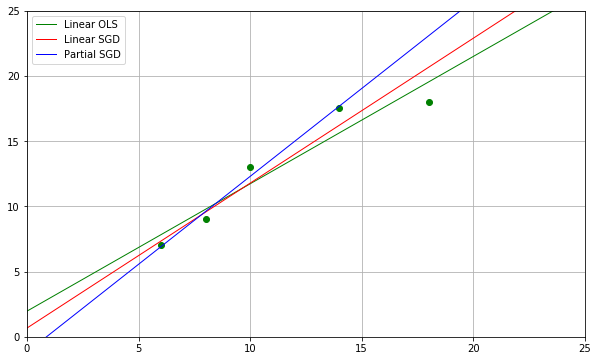

In [8]:
modelPartial = SGDRegressor(loss="squared_loss", max_iter=100000)
W = [1, 1, 1, 1, 0]
W = np.array(W)
modelPartial.fit(X, Y, sample_weight=W)

plt.figure(figsize=(10,6))
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid()

plt.plot([0, 25], modelL.predict([[0], [25]]), 
         color='g', linestyle='-', linewidth=1, label="Linear OLS")
plt.plot([0, 25], model.predict([[0], [25]]), 
         color='r', linestyle='-', linewidth=1, label="Linear SGD")
plt.plot([0, 25], modelPartial.predict([[0], [25]]), 
         color='b', linestyle='-', linewidth=1, label="Partial SGD")
plt.legend()